# **Лабораторная работа 2**
Отхонов Б.Н. КТбо3-8

Бакухин А.П. КТбо3-8

In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model

**Чтение файлов**

In [18]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

print('Number of null values in training set:',train.isnull().sum().sum())
print('Number of null values in test set:',test.isnull().sum().sum())

Number of null values in training set: 0
Number of null values in test set: 0


**Инициализация**

X - пиксели 

Y - цифры для распознавания

In [19]:
X = train.drop(['label'], axis=1).values
Y = train['label'].values

X = X / 255.0 # Нормализация в оттенках серого, чтобы уменьшить влияние различий в освещенности

**Визуализация данных**

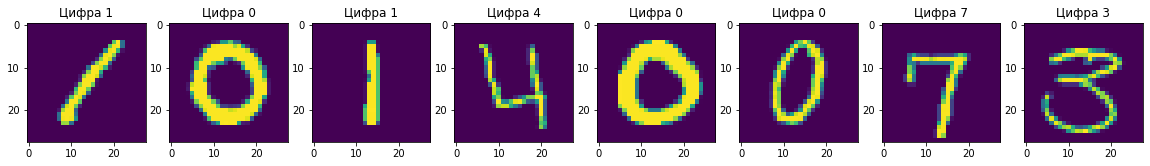

In [20]:
X_temp = X.reshape(X.shape[0], 28, 28)

fig, axis = plt.subplots(1, 8, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_temp[i], interpolation='nearest')
    digit = Y[i]
    ax.set(title = f"Цифра {digit}");

# Логистическая регрессия

In [21]:
# Разделение на тестовые и обучаемые данные
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

logisticRegr = LogisticRegression(solver='liblinear', max_iter=10000)
logisticRegr.fit(X_train, Y_train)
predictions = logisticRegr.predict(X_test)

accuracy = logisticRegr.score(X_test, Y_test)
print(accuracy)

0.9164761904761904


# Многослойная нейронная сеть

**Предварительная нормализация**

In [22]:
# Изменить форму изображения в 3 измерениях (высота = 28 пикселей, ширина = 28 пикселей, канал = 1)
X = X.reshape(-1,28,28,1)

# Преобразовать вектор в бинарную матрицу
Y = to_categorical(Y)

In [23]:
# Разделение на тестовые и обучаемые данные
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (37800, 10), (4200, 10))

**CNN - Свёрточная нейронная сеть**

In [24]:
model = Sequential()
   
# Два сверточных слоя
model.add(Conv2D(
    input_shape=(28,28,1),                    # входная размерность
    filters=64,                               # количество выходных фильтров в свертке
    kernel_size = (3,3),                      # размерность карнела (т. е. высота и ширина окна свертки) 
    activation="relu"                         # функция активации
))
model.add(Conv2D(
    filters=64,                               # количество выходных фильтров в свертке
    kernel_size = (3,3),                      # размерность карнела (т. е. высота и ширина окна свертки) 
    activation="relu"                         # функция активации
))

# Слой максимального объединения
model.add(MaxPooling2D(
    pool_size=(2,2)                           # размер окна, по которому брать максимум
))

# Слой нормализации входных данных
model.add(BatchNormalization())

# Два сверточных слоя
model.add(Conv2D(
    filters=128,                              # количество выходных фильтров в свертке
    kernel_size = (3,3),                      # размерность карнела (т. е. высота и ширина окна свертки) 
    activation="relu"                         # функция активации
))
model.add(Conv2D(
    filters=128,                              # количество выходных фильтров в свертке
    kernel_size = (3,3),                      # размерность карнела (т. е. высота и ширина окна свертки) 
    activation="relu"                         # функция активации
))

# Слой максимального объединения
model.add(MaxPooling2D(
    pool_size=(2,2)                           # размер окна, по которому брать максимум
))

# Слой нормализации входных данных
model.add(BatchNormalization())

# Сверточный слой
model.add(Conv2D(
    filters=256,                              # количество выходных фильтров в свертке
    kernel_size = (3,3),                      # размерность карнела (т. е. высота и ширина окна свертки) 
    activation="relu"                         # функция активации
))

# Слой максимального объединения
model.add(MaxPooling2D(
    pool_size=(2,2)                           # размер окна, по которому брать максимум
))

# Слой нормализации входных данных
model.add(BatchNormalization())

# Слой сглаживания (необходим после сверточных/объединения слоев и перед плотно связанными слоями)
model.add(Flatten())

# Входной слой
model.add(Dense(
    units=512,                                # размерность выходного пространства
    activation="relu"                         # функция активации                   
))

# Скрытый слой
model.add(Dense(
    units=128,                                # размерность выходного пространства
    activation='relu'                         # функция активации                   
))

# Выходной слой
model.add(Dense(
    units=10,                                 # размерность выходного пространства
    activation="softmax"                      # функция активации 
))

model.compile(
    optimizer="adam",                         # оптимизатор 
    loss="categorical_crossentropy",          # функция потери
    metrics=["accuracy"]                      # cписок показателей, которые будут оцениваться моделью во время обучения и тестирования
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_6 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 12, 12, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 128)        

**Обучние модели**

•	EarlyStopping – для остановки обучения, когда отслеживаемый показатель перестал улучшаться

•	ReduceLROnPlateau – для уменьшения скорости обучения, когда показатель перестал улучшаться


In [25]:
# Инициализация
EPOCHS = 50
BATCH_SIZE = 128
TRAIN_STEPS = X_train.shape[0] // BATCH_SIZE
VALID_STEPS = X_test.shape[0] // BATCH_SIZE


es = keras.callbacks.EarlyStopping(
    monitor="val_accuracy",                # метрики для мониторинга
    patience=10,                      # сколько эпох до остановки
    verbose=1,                        # режим 1 отображает сообщения, когда обратный вызов выполняет действие
    mode="max",                       # нам нужна максимальная точность
    restore_best_weights=True,        # восстанавливать веса модели из эпохи с лучшим значением
)

rp = keras.callbacks.ReduceLROnPlateau(
    monitor="val_accuracy",                # метрики для мониторинга
    factor=0.2,                       # коэффициент, на который будет снижена скорость обучения
    patience=3,                       # количество эпох без улучшения, после которых скорость обучения будет снижена
    verbose=1,                        # режим 1 отображает сообщения, когда обратный вызов выполняет действие
    mode="max",                       # нам нужна максимальная точность
    min_lr=0.00001,                   # нижняя граница скорости обучения
)


history = model.fit(
    X_train, 
    Y_train,
    batch_size=BATCH_SIZE,            # количество выборок на обновление градиента
    epochs=EPOCHS,                    # количество итераций        
    steps_per_epoch=TRAIN_STEPS,      # Общее количество шагов (партий выборок) перед объявлением одной эпохи завершенной и началом следующей эпохи.
    validation_data=(X_test,Y_test),  # данные для оценки потерь и любых показателей модели в конце каждой эпохи
    validation_steps=VALID_STEPS,     #  Общее количество шагов (партий выборок) для рисования перед остановкой при выполнении проверки в конце каждой эпохи.
    callbacks=[es, rp]
)

Epoch 1/50
295/295 [==============================] - 5s 16ms/step - loss: 0.1073 - accuracy: 0.9680 - val_loss: 1.7993 - val_accuracy: 0.3342 - lr: 0.0010
Epoch 2/50
295/295 [==============================] - 4s 14ms/step - loss: 0.0361 - accuracy: 0.9887 - val_loss: 0.0753 - val_accuracy: 0.9766 - lr: 0.0010
Epoch 3/50
295/295 [==============================] - 4s 14ms/step - loss: 0.0279 - accuracy: 0.9918 - val_loss: 0.0793 - val_accuracy: 0.9802 - lr: 0.0010
Epoch 4/50
295/295 [==============================] - 4s 14ms/step - loss: 0.0204 - accuracy: 0.9937 - val_loss: 0.0647 - val_accuracy: 0.9851 - lr: 0.0010
Epoch 5/50
295/295 [==============================] - 4s 14ms/step - loss: 0.0201 - accuracy: 0.9935 - val_loss: 0.0667 - val_accuracy: 0.9829 - lr: 0.0010
Epoch 6/50
295/295 [==============================] - 4s 15ms/step - loss: 0.0204 - accuracy: 0.9935 - val_loss: 0.0348 - val_accuracy: 0.9905 - lr: 0.0010
Epoch 7/50
295/295 [==============================] - 4s 14ms/st

**Диаграмма свёрточной нейронной сети**

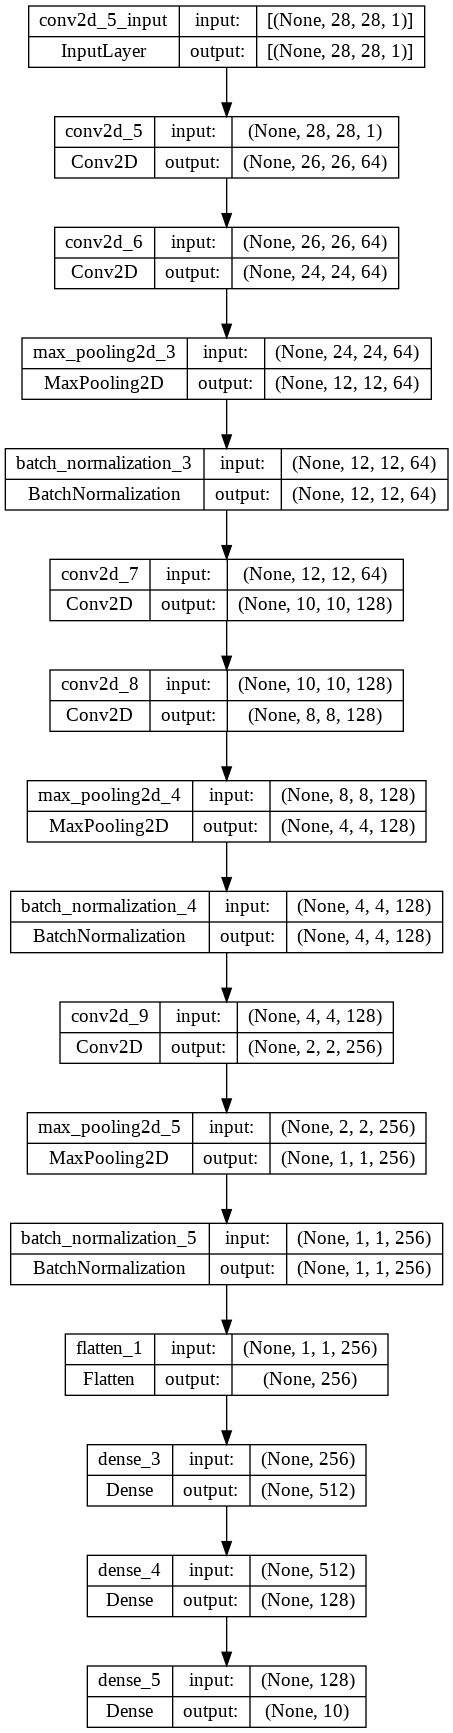

In [26]:
plot_model(model, to_file='result.png', show_shapes=True, show_layer_names=True)

**Кривые точности**

accuracy - для обучеющего набора

val_accuracy - для проверочного набора

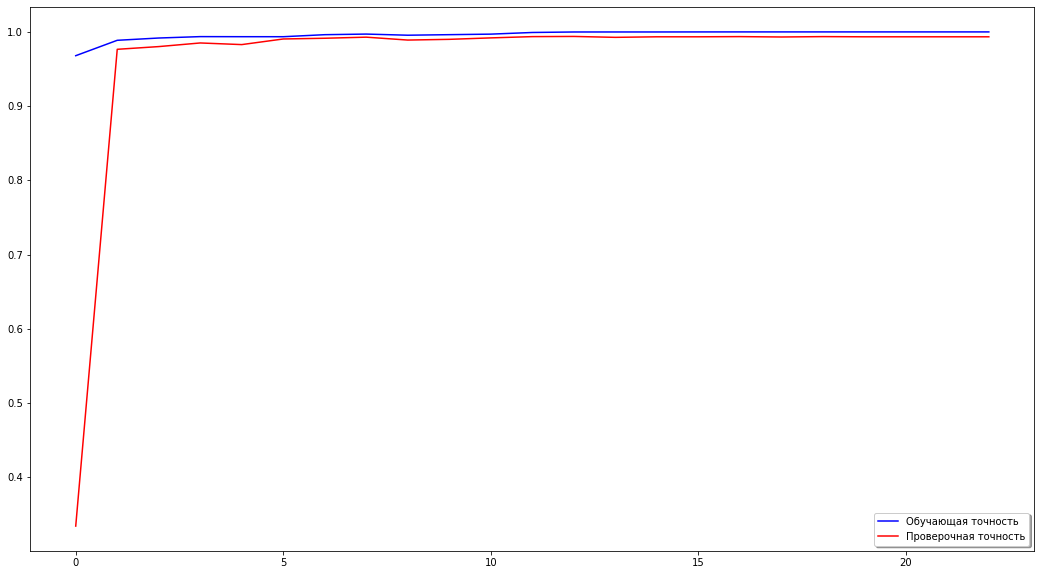

In [32]:
# Кривые точности для обучения и проверки
fig, ax = plt.subplots(1,1, figsize=(18, 10))

ax.plot(history.history['accuracy'], color='b', label="Обучающая точность")
ax.plot(history.history['val_accuracy'], color='r',label="Проверочная точность")
legend = ax.legend(loc='best', shadow=True)

**Прогнозирование цифр**

132/132 [==============================] - 0s 2ms/step


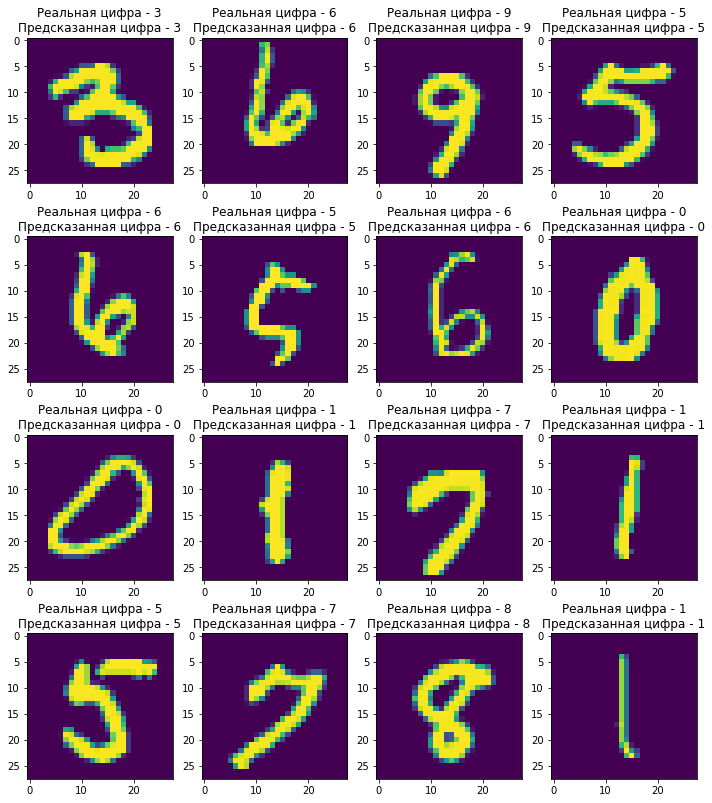

In [28]:
Y_pred = model.predict(X_test)
X_test_temp = X_test.reshape(X_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test_temp[i], interpolation='nearest')
    ax.set(title = f"Реальная цифра - {Y_test[i].argmax()}\nПредсказанная цифра - {Y_pred[i].argmax()}");

**Прогнозирование цифр для test.csv**

In [29]:
# Обработка тестовых данных
X_test = test.values
X_test = X_test / 255.0
X_test = X_test.reshape(-1,28,28,1)

# Прогнозирование тестовых данных
pred = model.predict(X_test, verbose=1)
result = []
for i in range(0, int(pred.size / 10)):
  result.append(pred[i].argmax())

# Формирование файла
sub['Label'] = result
sub.to_csv("result.csv", index=False)
sub.tail()

875/875 [==============================] - 2s 2ms/step


,ImageId,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2
